# Model Assessment

In [1]:
from keras.models import load_model
import pickle
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, precision_score, classification_report, roc_curve, auc, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
# fix rng seed
seed = 42
np.random.seed(seed)

Using TensorFlow backend.


In [2]:
dataset = pd.read_pickle("../data/production/imputed_dataset.pickle")
Y = dataset["USDA Model"]
X = dataset.drop("USDA Model", axis="columns")
x = X.values
# encode response as 1/0
encoded_Y = LabelEncoder().fit_transform(Y.values)

## Import Saved Models

In [3]:
nadam = load_model("../models/nadam.h5")
adamax = load_model("../models/adamax.h5")
with open("../models/logreg.pickle", "rb") as modelfile:
    logreg = pickle.load(modelfile)

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.


## Logistic Regression

In [4]:
logreg.score(X,Y)

0.8238892466194462

In [5]:
y_pred = logreg.predict(X)
confusion_matrix(encoded_Y, y_pred)

array([[2505,   45],
       [ 502,   54]])

In [6]:
print(classification_report(encoded_Y, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.98      0.90      2550
           1       0.55      0.10      0.16       556

    accuracy                           0.82      3106
   macro avg       0.69      0.54      0.53      3106
weighted avg       0.78      0.82      0.77      3106



In [7]:
y_score = logreg.decision_function(X)
fpr, tpr, _ = roc_curve(Y,y_score)
roc_auc = auc(fpr, tpr)

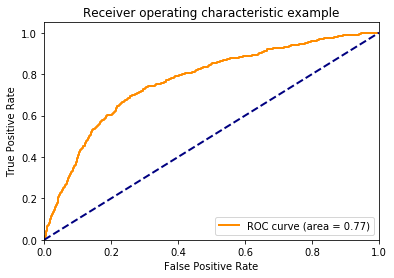

In [8]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [9]:
dataset["Logistic Regression"] = y_pred

## Neural Networks
### Adamax Optimizer

In [10]:
ypred = adamax.predict(x).round()

In [11]:
confusion_matrix(encoded_Y, ypred)

array([[2512,   38],
       [  60,  496]])

In [12]:
precision_score(encoded_Y, ypred)

0.9288389513108615

In [13]:
print(classification_report(encoded_Y, ypred))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      2550
           1       0.93      0.89      0.91       556

    accuracy                           0.97      3106
   macro avg       0.95      0.94      0.95      3106
weighted avg       0.97      0.97      0.97      3106



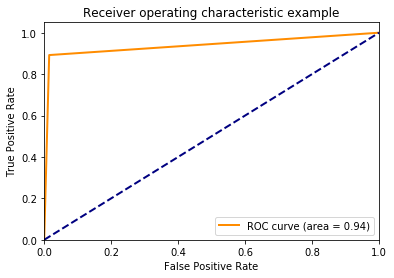

In [14]:
fpr, tpr, _ = roc_curve(encoded_Y, ypred)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [15]:
dataset["Adamax"] = ypred == 1

### Nadam Optimizer

In [16]:
ypred2 = nadam.predict(x).round()

In [17]:
confusion_matrix(encoded_Y, ypred2)

array([[2526,   24],
       [  69,  487]])

In [18]:
precision_score(encoded_Y, ypred2)

0.9530332681017613

In [19]:
print(classification_report(encoded_Y, ypred2))

              precision    recall  f1-score   support

           0       0.97      0.99      0.98      2550
           1       0.95      0.88      0.91       556

    accuracy                           0.97      3106
   macro avg       0.96      0.93      0.95      3106
weighted avg       0.97      0.97      0.97      3106



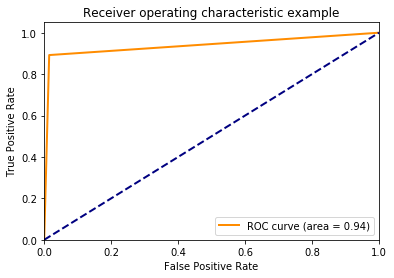

In [20]:
fpr, tpr, _ = roc_curve(encoded_Y, ypred)
roc_auc = auc(fpr, tpr)
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

In [21]:
dataset["Nadam"] = ypred2 == 1

In [22]:
dataset.to_pickle("../models/predictions.pickle")